# Tugas Mata Kuliah Deep Learning

- Model: Fully Connected Neural Network (FCNN)
- Oversampling: SMOTETomek
- Optimizer: Adam
- Validasi Silang: Holdout validation (train-test split)
- Metode Tambahan: -
- Fungsi Loss: Binary Crossentropy

Data Understanding dan Preliminary Analysis

In [68]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [69]:
df = pd.read_csv('../dl-b-project/2/capture20110811.binetflow')

In [70]:
print("Dataset Overview:")
print(df.head())

Dataset Overview:
                    StartTime       Dur Proto       SrcAddr  Sport    Dir  \
0  2011/08/11 09:53:40.240135  9.016532   tcp  31.96.153.11  60257     ->   
1  2011/08/11 09:55:01.054702  2.903761   tcp  83.228.37.92   2571     ->   
2  2011/08/11 09:55:02.677188  3.032142   tcp  83.228.37.92   2574     ->   
3  2011/08/11 09:55:04.307051  2.932428   tcp  83.228.37.92   2576     ->   
4  2011/08/11 09:55:03.958463  6.017523   tcp  83.228.37.92   2571     ->   

         DstAddr  Dport   State  sTos  dTos  TotPkts  TotBytes  SrcBytes  \
0  147.32.84.229    443  SRA_SA   0.0   0.0        7       508       208   
1  147.32.84.229  13363   SR_SA   0.0   0.0        3       184       122   
2  147.32.84.229    443   SR_SA   0.0   0.0        3       184       122   
3  147.32.84.229     80   SR_SA   0.0   0.0        3       184       122   
4  147.32.84.229  13363   SR_SA   0.0   0.0        3       184       122   

                             Label  
0  flow=Background-TCP-Es

In [71]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1808122 entries, 0 to 1808121
Data columns (total 15 columns):
 #   Column     Dtype  
---  ------     -----  
 0   StartTime  object 
 1   Dur        float64
 2   Proto      object 
 3   SrcAddr    object 
 4   Sport      object 
 5   Dir        object 
 6   DstAddr    object 
 7   Dport      object 
 8   State      object 
 9   sTos       float64
 10  dTos       float64
 11  TotPkts    int64  
 12  TotBytes   int64  
 13  SrcBytes   int64  
 14  Label      object 
dtypes: float64(3), int64(3), object(9)
memory usage: 206.9+ MB
None


In [72]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
                Dur          sTos          dTos       TotPkts      TotBytes  \
count  1.808122e+06  1.803798e+06  1.538287e+06  1.808122e+06  1.808122e+06   
mean   4.006726e+02  2.970399e-02  3.510398e-04  3.973805e+01  3.503811e+04   
std    9.516550e+02  2.297207e+00  2.970989e-02  4.073724e+03  4.190502e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  6.000000e+01   
25%    3.140000e-04  0.000000e+00  0.000000e+00  2.000000e+00  2.140000e+02   
50%    2.147000e-03  0.000000e+00  0.000000e+00  2.000000e+00  2.610000e+02   
75%    8.996974e+00  0.000000e+00  0.000000e+00  5.000000e+00  5.870000e+02   
max    3.600034e+03  1.920000e+02  3.000000e+00  4.077379e+06  4.376239e+09   

           SrcBytes  
count  1.808122e+06  
mean   2.210684e+03  
std    3.034949e+05  
min    0.000000e+00  
25%    7.900000e+01  
50%    8.500000e+01  
75%    3.100000e+02  
max    2.485222e+08  


In [73]:
print("\nUnique Labels in 'Label':")
print(df['Label'].value_counts())


Unique Labels in 'Label':
Label
flow=To-Background-UDP-CVUT-DNS-Server                                     660177
flow=Background-UDP-Established                                            602264
flow=Background-UDP-Attempt                                                201380
flow=Background-TCP-Established                                            149962
flow=Background-Established-cmpgw-CVUT                                      78133
                                                                            ...  
flow=From-Botnet-V43-TCP-Established-HTTP-Ad-60                                 1
flow=From-Botnet-V43-TCP-HTTP-Not-Encrypted-Down-2                              1
flow=From-Botnet-V43-TCP-Established-HTTP-Binary-Download-Custom-Port-5         1
flow=From-Botnet-V43-TCP-Established-HTTP-Binary-Download-Custom-Port-7         1
flow=From-Botnet-V43-TCP-Established-HTTP-Ad-23                                 1
Name: count, Length: 132, dtype: int64


In [74]:
df.isnull().sum()

StartTime         0
Dur               0
Proto             0
SrcAddr           0
Sport          3993
Dir               0
DstAddr           0
Dport          2973
State             0
sTos           4324
dTos         269835
TotPkts           0
TotBytes          0
SrcBytes          0
Label             0
dtype: int64

Data Cleaning

In [ ]:
# Mengisi nilai kosong di kolom numerik dengan median
numeric_cols = ['Dur', 'TotPkts', 'TotBytes', 'SrcBytes', 'sTos', 'dTos']
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Mengisi nilai kosong di kolom kategorikal dengan mode
categorical_cols = ['SrcAddr', 'DstAddr', 'Sport', 'Dport']
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Menghapus kolom yang memiliki banyak nilai kosong atau tidak relevan
df.drop(['StartTime'], axis=1, inplace=True)

# Konversi kolom label ke format biner (Botnet: 1, Normal: 0)
df['Label'] = df['Label'].apply(lambda x: 1 if 'Botnet' in x else 0)

print(f"Dataset shape after cleaning: {df.shape}")
print(f"Missing values: \n{df.isnull().sum()}")

Dataset shape after cleaning: (1808122, 14)
Missing values: 
Dur         0
Proto       0
SrcAddr     0
Sport       0
Dir         0
DstAddr     0
Dport       0
State       0
sTos        0
dTos        0
TotPkts     0
TotBytes    0
SrcBytes    0
Label       0
dtype: int64


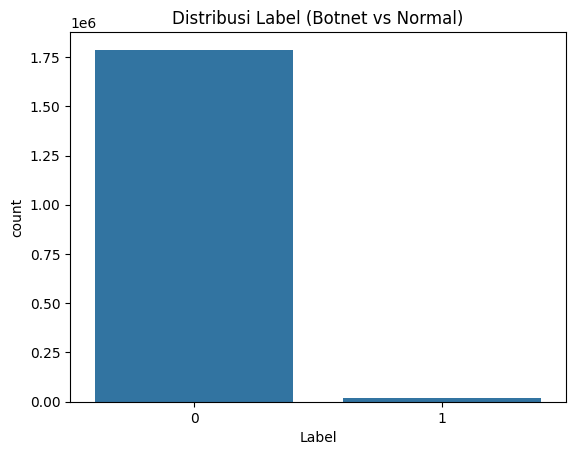

In [76]:
# Distribusi kelas
sns.countplot(data=df, x='Label')
plt.title('Distribusi Label (Botnet vs Normal)')
plt.show()

In [77]:
# Heatmap korelasi
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi")
plt.show()

ValueError: could not convert string to float: 'tcp'

Data Preprocessing

In [78]:
# Konversi fitur kategorikal menjadi numerik
df = pd.get_dummies(df, columns=['Proto', 'Dir', 'State'], drop_first=True)

# Split data menjadi X dan y
X = df.drop(categorical_cols + ['Label'], axis=1)
y = df['Label']

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Shape of X_train: {X_train.shape}, Shape of X_test: {X_test.shape}")

Shape of X_train: (1446497, 252), Shape of X_test: (361625, 252)


Sampling

In [ ]:
from imblearn.combine import SMOTETomek

# SMOTE untuk menangani imbalance
smt = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smt.fit_resample(X_train, y_train)

# Verifikasi distribusi setelah SMOTE
print(f"Distribusi Label Setelah SMOTE:\n{pd.Series(y_train_resampled).value_counts()}")


Modeling

In [ ]:
# Define model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train_resampled, y_train_resampled, validation_split=0.2, epochs=10, batch_size=64, verbose=1)

c:\Users\AHMAD ZAKI\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
35744/35744 ━━━━━━━━━━━━━━━━━━━━ 50s 1ms/step - accuracy: 0.9156 - loss: 0.2100 - val_accuracy: 0.9297 - val_loss: 0.2568
Epoch 2/10
35744/35744 ━━━━━━━━━━━━━━━━━━━━ 42s 1ms/step - accuracy: 0.9294 - loss: 0.1948 - val_accuracy: 0.9246 - val_loss: 0.2469
Epoch 3/10
35744/35744 ━━━━━━━━━━━━━━━━━━━━ 42s 1ms/step - accuracy: 0.9309 - loss: 0.1934 - val_accuracy: 0.9145 - val_loss: 0.2720
Epoch 4/10
35744/35744 ━━━━━━━━━━━━━━━━━━━━ 44s 1ms/step - accuracy: 0.9318 - loss: 0.1919 - val_accuracy: 0.9188 - val_loss: 0.2447
Epoch 5/10
35744/35744 ━━━━━━━━━━━━━━━━━━━━ 43s 1ms/step - accuracy: 0.9325 - loss: 0.1917 - val_accuracy: 0.9196 - val_loss: 0.2703
Epoch 6/10
35744/35744 ━━━━━━━━━━━━━━━━━━━━ 43s 1ms/step - accuracy: 0.9334 - loss: 0.1903 - val_accuracy: 0.8915 - val_loss: 0.2810
Epoch 7/10
35744/35744 ━━━━━━━━━━━━━━━━━━━━ 43s 1ms/step - accuracy: 0.9338 - loss: 0.1909 - val_accuracy: 0.9270 - val_loss: 0.2513
Epoch 8/10
35744/35744 ━━━━━━━━━━━━━━━━━━━━ 43s 1ms/step - accuracy: 

Evaluasi Model

Test Loss: 0.1359
Test Accuracy: 0.9444


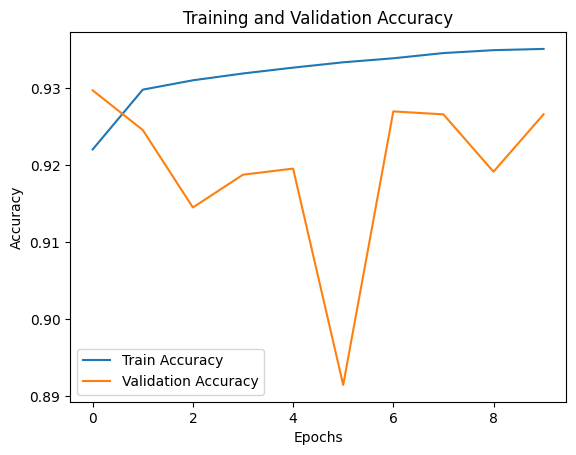

11301/11301 ━━━━━━━━━━━━━━━━━━━━ 7s 610us/step


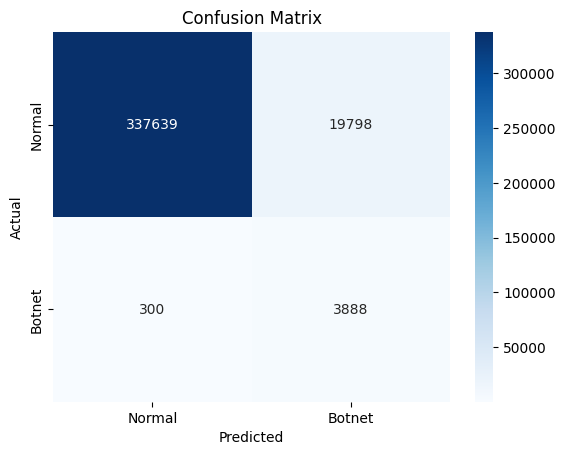


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    357437
           1       0.16      0.93      0.28      4188

    accuracy                           0.94    361625
   macro avg       0.58      0.94      0.63    361625
weighted avg       0.99      0.94      0.96    361625



In [ ]:
# Evaluate model on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()

# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report

y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Botnet'], yticklabels=['Normal', 'Botnet'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
# Save the model
model.save("fcnn_smotetomek_adam_binary_crossentropy.h5")
print("Model has been saved as 'fcnn_smotetomek_adam_binary_crossentropy.h5'")


Model has been saved as 'botnet_detection_model.h5'
